Last block columns ranges:
  col1 min/max: 0.0 1.0
  col2 min/max: 0.0 7.53279508
  col3 min/max: -0.00381571 0.1554091
Peak at: col1=0.6679, col2=5.0310, col3=0.155409 Eh = 97.52 kcal/mol


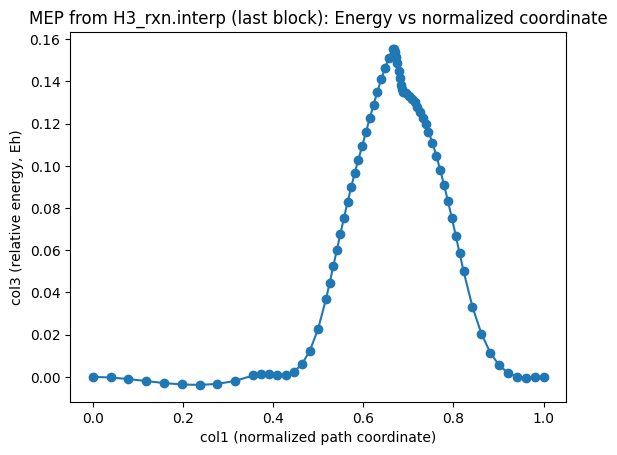

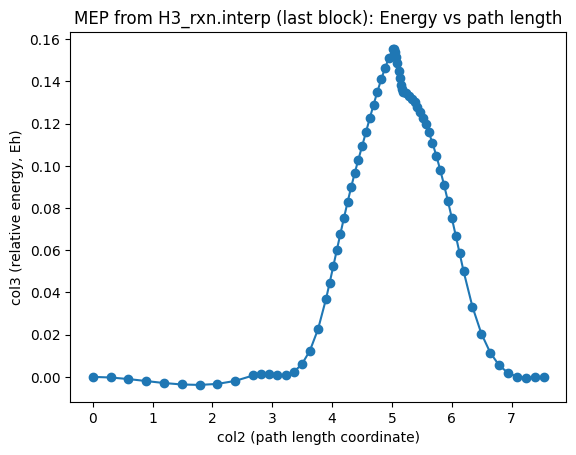

In [4]:
import re, numpy as np, matplotlib.pyplot as plt, os

path = "H3_rxn.interp"

# Parse numeric blocks
with open(path, "r", encoding="utf-8", errors="replace") as f:
    lines = f.readlines()

float_line = re.compile(r"^\s*[-+0-9.]+(?:[eEdD][-+]?\d+)?\s+[-+0-9.]+(?:[eEdD][-+]?\d+)?")
blocks, cur = [], []
for line in lines:
    if float_line.match(line):
        cur.append(line.replace("D","E").replace("d","E"))
    else:
        if cur:
            blocks.append(cur); cur=[]
if cur:
    blocks.append(cur)

data = np.loadtxt(blocks[-1])
c1, c2, c3 = data[:,0], data[:,1], data[:,2]  # inferred meaning below

# Identify peak
imax = np.argmax(c3)
peak = (c1[imax], c2[imax], c3[imax])
hartree_to_kcal = 627.509474

print("Last block columns ranges:")
print("  col1 min/max:", float(c1.min()), float(c1.max()))
print("  col2 min/max:", float(c2.min()), float(c2.max()))
print("  col3 min/max:", float(c3.min()), float(c3.max()))
print(f"Peak at: col1={peak[0]:.4f}, col2={peak[1]:.4f}, col3={peak[2]:.6f} Eh = {peak[2]*hartree_to_kcal:.2f} kcal/mol")

# Plot 1: normalized coordinate vs relative energy
plt.figure()
plt.plot(c1, c3, marker="o")
plt.xlabel("col1 (normalized path coordinate)")
plt.ylabel("col3 (relative energy, Eh)")
plt.title("MEP from H3_rxn.interp (last block): Energy vs normalized coordinate")
plt.show()

# Plot 2: path length vs relative energy (often the most MEP-like)
plt.figure()
plt.plot(c2, c3, marker="o")
plt.xlabel("col2 (path length coordinate)")
plt.ylabel("col3 (relative energy, Eh)")
plt.title("MEP from H3_rxn.interp (last block): Energy vs path length")
plt.show()



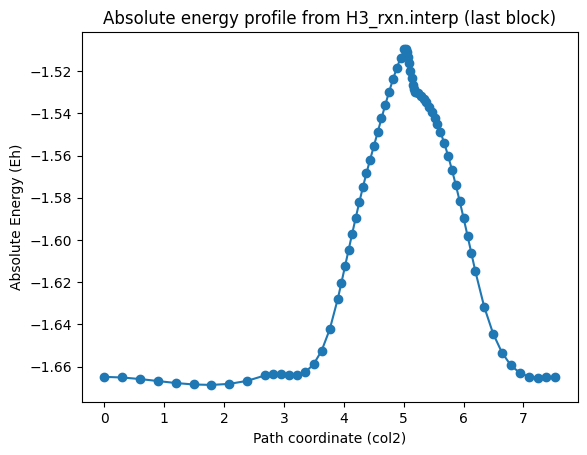

In [5]:
import re, numpy as np, matplotlib.pyplot as plt

# 1) Load last numeric block of the .interp
fname = "H3_rxn.interp"
float_line = re.compile(r"^\s*[-+0-9.]+(?:[eEdD][-+]?\d+)?\s+[-+0-9.]+(?:[eEdD][-+]?\d+)?")
blocks, cur = [], []
for line in open(fname, "r", errors="replace"):
    if float_line.match(line):
        cur.append(line.replace("D","E").replace("d","E"))
    else:
        if cur: blocks.append(cur); cur=[]
if cur: blocks.append(cur)

data = np.loadtxt(blocks[-1])
s_norm = data[:,0]      # 0..1
s_path = data[:,1]      # path-length-like coordinate
dE = data[:,2]          # relative energy (Eh)

# 2) Add the reactant absolute energy from your output
E0 = -1.664872          # Eh (Reactant energy printed by ORCA)
Eabs = E0 + dE

# 3) Plot absolute energy vs coordinate
plt.figure()
plt.plot(s_path, Eabs, marker="o")
plt.xlabel("Path coordinate (col2)")
plt.ylabel("Absolute Energy (Eh)")
plt.title("Absolute energy profile from H3_rxn.interp (last block)")
plt.show()


In [9]:
import re

E0 = None
with open("H4_rxn.out", "r", encoding="utf-8", errors="replace") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if "Reactant:" in line:
        # Look a few lines below for the energy line
        for l in lines[i+1:i+10]:
            m = re.search(r"E\s+\.{3}\s+(-?\d+\.\d+)\s+Eh", l)
            if m:
                E0 = float(m.group(1))
                break
        break

print("E0 =", E0)

E0 = None


Last block columns ranges:
  col1 min/max: 0.0 1.0
  col2 min/max: 0.0 3.43129858
  col3 min/max: -0.08164926 0.14742554
Peak at: col1=0.3616, col2=1.2408, col3=0.147426 Eh = 92.51 kcal/mol


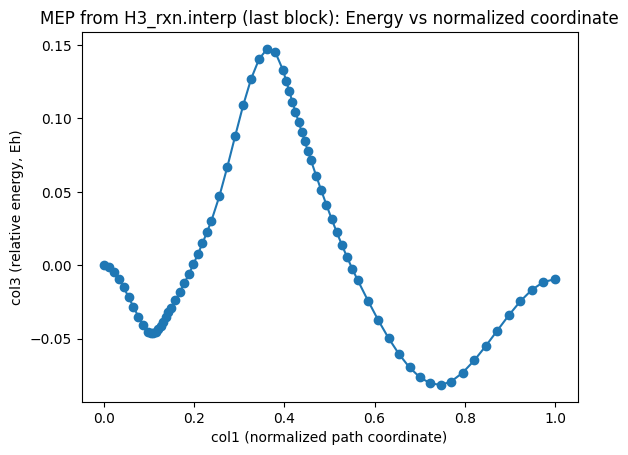

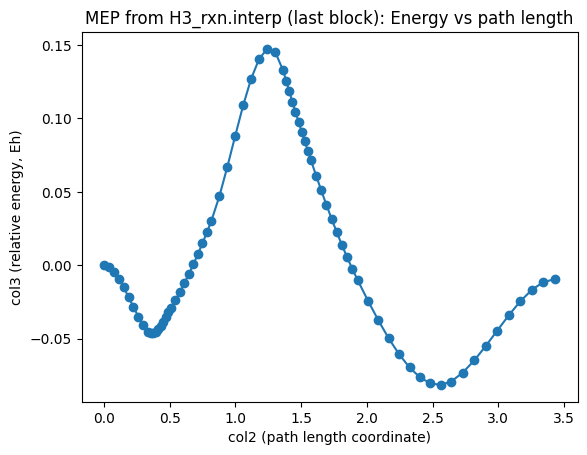

In [6]:
import re, numpy as np, matplotlib.pyplot as plt, os

path = "H4_rxn.interp"

# Parse numeric blocks
with open(path, "r", encoding="utf-8", errors="replace") as f:
    lines = f.readlines()

float_line = re.compile(r"^\s*[-+0-9.]+(?:[eEdD][-+]?\d+)?\s+[-+0-9.]+(?:[eEdD][-+]?\d+)?")
blocks, cur = [], []
for line in lines:
    if float_line.match(line):
        cur.append(line.replace("D","E").replace("d","E"))
    else:
        if cur:
            blocks.append(cur); cur=[]
if cur:
    blocks.append(cur)

data = np.loadtxt(blocks[-1])
c1, c2, c3 = data[:,0], data[:,1], data[:,2]  # inferred meaning below

# Identify peak
imax = np.argmax(c3)
peak = (c1[imax], c2[imax], c3[imax])
hartree_to_kcal = 627.509474

print("Last block columns ranges:")
print("  col1 min/max:", float(c1.min()), float(c1.max()))
print("  col2 min/max:", float(c2.min()), float(c2.max()))
print("  col3 min/max:", float(c3.min()), float(c3.max()))
print(f"Peak at: col1={peak[0]:.4f}, col2={peak[1]:.4f}, col3={peak[2]:.6f} Eh = {peak[2]*hartree_to_kcal:.2f} kcal/mol")

# Plot 1: normalized coordinate vs relative energy
plt.figure()
plt.plot(c1, c3, marker="o")
plt.xlabel("col1 (normalized path coordinate)")
plt.ylabel("col3 (relative energy, Eh)")
plt.title("MEP from H3_rxn.interp (last block): Energy vs normalized coordinate")
plt.show()

# Plot 2: path length vs relative energy (often the most MEP-like)
plt.figure()
plt.plot(c2, c3, marker="o")
plt.xlabel("col2 (path length coordinate)")
plt.ylabel("col3 (relative energy, Eh)")
plt.title("MEP from H3_rxn.interp (last block): Energy vs path length")
plt.show()

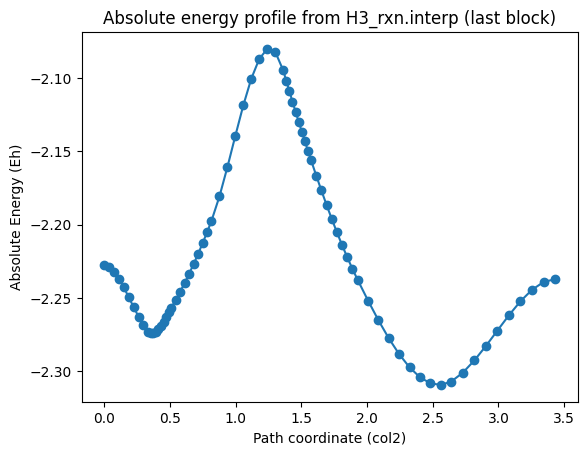

In [10]:
import re, numpy as np, matplotlib.pyplot as plt

# 1) Load last numeric block of the .interp
fname = "H4_rxn.interp"
float_line = re.compile(r"^\s*[-+0-9.]+(?:[eEdD][-+]?\d+)?\s+[-+0-9.]+(?:[eEdD][-+]?\d+)?")
blocks, cur = [], []
for line in open(fname, "r", errors="replace"):
    if float_line.match(line):
        cur.append(line.replace("D","E").replace("d","E"))
    else:
        if cur: blocks.append(cur); cur=[]
if cur: blocks.append(cur)

data = np.loadtxt(blocks[-1])
s_norm = data[:,0]      # 0..1
s_path = data[:,1]      # path-length-like coordinate
dE = data[:,2]          # relative energy (Eh)

# 2) Add the reactant absolute energy from your output
E0 = -2.227682          # Eh (Reactant energy printed by ORCA)
Eabs = E0 + dE

# 3) Plot absolute energy vs coordinate
plt.figure()
plt.plot(s_path, Eabs, marker="o")
plt.xlabel("Path coordinate (col2)")
plt.ylabel("Absolute Energy (Eh)")
plt.title("Absolute energy profile from H3_rxn.interp (last block)")
plt.show()
